# Linear Regression

In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
from typing import Any

# Ridge regularization
class l2_regularization:
  def __init__(self, alpha: float) -> None:
    self.alpha = alpha

  def __call__(self, w) -> float:
    return 0.5 * self.alpha * w.T.dot(w)
  
  def grad(self, w) -> float:
    return self.alpha * w

# Linear Regression
class LinearRegression():
  def __init__(self, n_iter: int, lr: float, reg_factor: float) -> None:
    self.nr_iterations = n_iter
    self.learning_rate = lr
    self.regularization = l2_regularization(reg_factor)
  
  def initialize_wandb(self, n_features):
    # Initialize weights randomly [-1/N, 1/N]
    limit = 1 / np.sqrt(n_features)
    self.w = np.random.uniform(-limit, limit, (n_features, ))

  def fit(self, X, y):
    X = np.insert(X, 0, 1, axis=1)
    self.training_errors = []
    # initalize weights
    self.initialize_wandb(X.shape[1])

    for _ in range(self.nr_iterations):
      y_pred = X.dot(self.w)
      
      mse = np.mean(0.5 * np.square(y_pred - y) + self.regularization(self.w)) # 0.5 makes derivation more convenient (^2)
      
      # save history
      self.training_errors.append(mse)

      # gradient descent
      grad_w = (y_pred - y).dot(X) + self.regularization.grad(self.w)
      
      # Update the weights
      self.w -= self.learning_rate * grad_w

    print(self.training_errors)

  def predict(self, X):
    # Insert constant ones for bias weights
    X = np.insert(X, 0, 1, axis=1)
    y_pred = X.dot(self.w)
    return y_pred

In [117]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=1)

In [118]:
model = LinearRegression(n_iter=100, lr=0.01, reg_factor=0.0001)
model.fit(X, y)

[3269.6851399760835, 133.62920445969502, 5.68364834254489, 0.5021021064083525, 0.28451461708291775, 0.27695055830475895, 0.2763794847084041, 0.27640927478412886, 0.2763997779092858, 0.276401553015046, 0.2764011889067805, 0.2764012621703234, 0.27640124737167554, 0.2764012503585527, 0.276401249755603, 0.27640124987731435, 0.27640124985274545, 0.276401249857705, 0.2764012498567038, 0.2764012498569059, 0.27640124985686515, 0.27640124985687337, 0.27640124985687176, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124985687203, 0.27640124

In [119]:
model.predict(np.array([[8]]))

array([594.8055117])

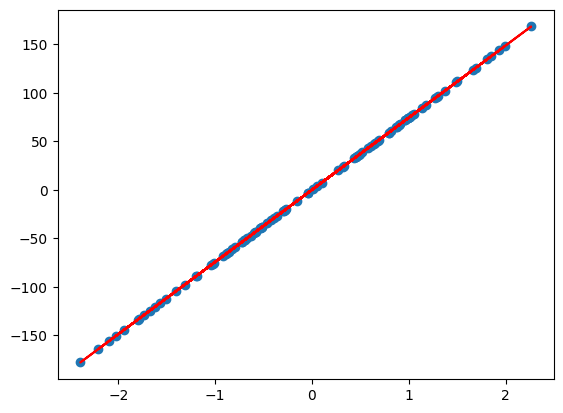

In [120]:
plt.scatter(X, y)
f = lambda x: x*model.w[1] + model.w[0]
plt.plot(X, f(X), color='red');

## Sklearn Linear Regression

In [121]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([74.35075084]), 0.0)

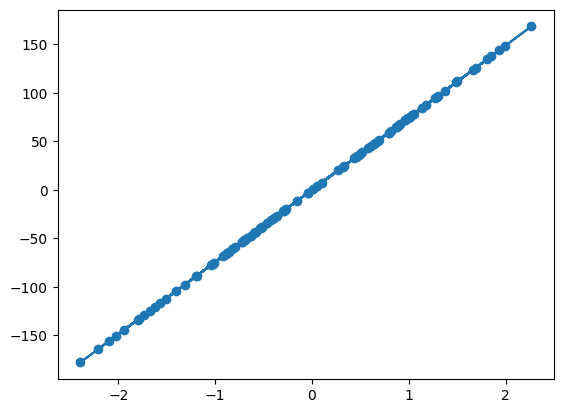

In [122]:
plt.scatter(X, y)
f = lambda x: x*lr.coef_ + lr.intercept_
plt.plot(X, f(X))

In [123]:
lr.predict(np.array([[8]]))

array([594.80600672])